In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import itertools
import os
import random
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
test_data = "C:/Users/gabot/Desktop/De Guzman/old Covid 19 Images/train"
train_data = "C:/Users/gabot/Desktop/De Guzman/old Covid 19 Images/test"
valid_data = "C:/Users/gabot/Desktop/De Guzman/old Covid 19 Images/validation/"

In [3]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_data, target_size=(224,224), classes=['Covid','Viral Pneumonia', 'Normal'], batch_size=10, shuffle=False)
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_data, target_size=(224,224), classes=['Covid','Viral Pneumonia', 'Normal'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_data, target_size=(224,224), classes=['Covid','Viral Pneumonia', 'Normal'], batch_size=10)

Found 249 images belonging to 3 classes.
Found 65 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

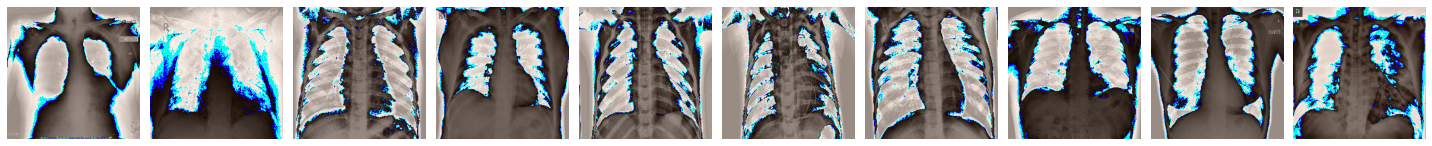

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [5]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [6]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
    ])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 3)                 6

In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
batch_size = 10 
history = model.fit(
    x = train_batches, 
    steps_per_epoch=train_batches.samples // batch_size, 
    epochs=10, 
    validation_data=test_batches, 
    validation_steps=test_batches.samples // batch_size,
    verbose=2)

Epoch 1/10
6/6 - 27s - loss: 54.4454 - accuracy: 0.3636 - val_loss: 9.8112 - val_accuracy: 0.6292 - 27s/epoch - 4s/step
Epoch 2/10
6/6 - 25s - loss: 6.6656 - accuracy: 0.8333 - val_loss: 18.0718 - val_accuracy: 0.7167 - 25s/epoch - 4s/step
Epoch 3/10
6/6 - 25s - loss: 2.3613 - accuracy: 0.9455 - val_loss: 8.8684 - val_accuracy: 0.7958 - 25s/epoch - 4s/step
Epoch 4/10
6/6 - 22s - loss: 0.1922 - accuracy: 0.9636 - val_loss: 8.4143 - val_accuracy: 0.7708 - 22s/epoch - 4s/step
Epoch 5/10
6/6 - 25s - loss: 0.3027 - accuracy: 0.9818 - val_loss: 6.7446 - val_accuracy: 0.8167 - 25s/epoch - 4s/step
Epoch 6/10
6/6 - 23s - loss: 3.2512e-08 - accuracy: 1.0000 - val_loss: 8.0560 - val_accuracy: 0.8250 - 23s/epoch - 4s/step
Epoch 7/10
6/6 - 23s - loss: 8.8518e-06 - accuracy: 1.0000 - val_loss: 10.1462 - val_accuracy: 0.8292 - 23s/epoch - 4s/step
Epoch 8/10
6/6 - 23s - loss: 0.0383 - accuracy: 0.9818 - val_loss: 10.1868 - val_accuracy: 0.7708 - 23s/epoch - 4s/step
Epoch 9/10
6/6 - 23s - loss: 0.0000e

In [9]:
predictions = model.predict(x = test_batches, verbose=0)

In [10]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')   

Text(0.5, 6.800000000000011, 'Predicted label')

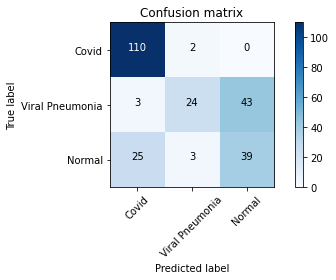

In [11]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
plot_confusion_matrix(cm, classes = ['Covid', 'Viral Pneumonia', 'Normal'])

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [12]:
classes = ['C','V', 'N']

lbl = []
out = []

for i in os.listdir(valid_data):
    valid_img = tf.keras.utils.load_img(valid_data+i,target_size=(224,224))
    valid_img = tf.keras.utils.img_to_array(valid_img)
    valid_img = np.expand_dims(valid_img,axis=0)
    predict_x=model.predict(valid_img)
    output = classes[np.argmax(predict_x)]
    lbl.append(i)
    out.append(output)
    print("Picture #", i,"\n Diagnosis: ", output)

1/1 [==============================] - 0s 142ms/step
Picture # pic1.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 50ms/step
Picture # pic10.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 47ms/step
Picture # pic2.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 52ms/step
Picture # pic3.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 52ms/step
Picture # pic4.jpeg 
 Diagnosis:  V
1/1 [==============================] - 0s 66ms/step
Picture # pic5.jpeg 
 Diagnosis:  N
1/1 [==============================] - 0s 66ms/step
Picture # pic6.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 94ms/step
Picture # pic7.jpg 
 Diagnosis:  C
1/1 [==============================] - 0s 61ms/step
Picture # pic8.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 57ms/step
Picture # pic9.jpeg 
 Diagnosis:  C


In [13]:
lbl = pd.DataFrame(lbl, columns = ["Picture #"])
out = pd.DataFrame(out, columns = ['Diagnosis'])

final_output = pd.concat([lbl, out], axis = 1)
final = final_output.set_index("Picture #")

In [14]:
outputcsv = final.to_csv('deguzman_cnn_output.csv')